In [3]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

1415
31


In [3]:
# data_file_path

In [4]:
train_data_file_path[1414]

'../SE_train_processed\\AV-龚晓宇-20220701(scale_up).fif'

In [5]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter,result
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0
...,...,...
1410,3,1
1411,3,1
1412,3,1
1413,3,1


In [6]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter,result
0,1,1
1,2,1
2,3,1
3,4,1
4,1,1
5,4,1
6,2,0
7,3,1
8,1,0
9,4,1


In [7]:
#发作为1；未发作为0
y_train=[]
for i in range(df_train.shape[0]):
    if df_train.iloc[i,1]==1:
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in range(df_test.shape[0]):
    if df_test.iloc[i,1]==1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

1415
655
31
28


In [8]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16

In [9]:
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_train:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

11320


In [10]:
y_long_test_data=[]
for i in y_test:
    for j in range((int)(test_SE_len/2)):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

248


In [4]:
import scipy.signal
import scipy.io as scio   
#设定为2s一段
samps = 2

In [12]:
train_data_file_path

['../SE_train_processed\\AV-严聪慧-20220803(flip).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(jitter).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(original).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(scale_down).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(scale_up).fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_1.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_10.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_11.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_12.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_13.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_14.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_15.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_16.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_17.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_18.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_19.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_fl

In [13]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_train.append(data_temp)   

Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(original).fif) does not conf

Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_15.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220525(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220525(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220525(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220530(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220530(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-习俊豪-20220530(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-习俊豪-20220525(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-习俊豪-20220525(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-习俊豪-20220525(scale_up).fif) does 

Opening raw data file ../SE_train_processed\AV-何晓丽-20220831(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220829(fl

Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-何晓丽-20220831(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-倪泽菁-20220826(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-倪泽菁-20220826(jitter).fif) does not conf

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220801(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220801(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220801(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-刘汉悦-20220617(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-刘汉悦-20220617(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-刘汉悦-20220617(scale_up).fif) does 

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220706random_flip_30.fif...
Isotrak not found
    Range : 0 ...

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴启洲-20220706random_flip_25.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴启洲-20220706random_flip_26.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴启洲-20220706random_flip_27.

Opening raw data file ../SE_train_processed\AV-唐心诚-20220829(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220829

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220829(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220829(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220829(original).fif) does not conf

Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE

Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923(original).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_16.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ... 

Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220613(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-夏帆-20220923(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-夏帆-20220923(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-尤李心怡-20220815(flip).fif) does not c

Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220613(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220613(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220613(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220613(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220615(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-20220615(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张君莉-202206

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_10.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张君莉-20220613(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张君莉-20220613(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张君莉-20220613(scale_down).fif) does no

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220822random_flip_16.fif...
Isotrak not found
    Range : 0 ..

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_23.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220822random_flip_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220822random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220822random_flip_12.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.00

Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_6.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220824random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220824random_flip_25.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220824random_flip_26.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220826random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220713(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 .

Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220718(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220718(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220826random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220826random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220826random_flip_8.fif

Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220720

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_12.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220720(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220720(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220720(original).fif) does not conf

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-施佩玲-20220624random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.00

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220720random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220720random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220720random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220720random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220720random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220720random_flip_34.fif...
Isotrak not found
    Range : 0 ...

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220720random_flip_25.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220720random_flip_26.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220720random_flip_27.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4

Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220516(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220516(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220518(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725random_flip_33.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725random_flip_34.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725random_flip_35.

Opening raw data file ../SE_train_processed\AV-祝煜达-20220518(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220518(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220518(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220518(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220520(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220520(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祝煜达-20220520(orig

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220720(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220720(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祝煜达-20220518(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祝煜达-20220518(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祝煜达-20220518(scale_down).fif) does no

Opening raw data file ../SE_train_processed\AV-罗文彤-20220722(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220722(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220722(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220722(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220722(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220725(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-罗文彤-20220725(jitter

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824(scale_up).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-罗文彤-20220722(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-罗文彤-20220722(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-罗文彤-20220722(original).fif) does not conf

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220718(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.99

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邓敏-20220613(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-胡杨-20220824(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220711(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220711(jitter).fif) does not confo

Ready.
Opening raw data file ../SE_train_processed\AV-邓敏-20220613(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邓敏-20220615(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邓敏-20220615(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邓敏-20220615(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邓敏-20220615(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邓敏-20220615(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邹立-20220518(fl

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-邓敏-20220613(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-邓敏-20220615(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-邓敏-20220615(jitter).fif) does not conform

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220706random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 

Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_6.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220706random_flip_25.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220706random_flip_26.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220706random_flip_27.fif

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220708random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220711(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220711(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-雷磊-20220711(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220708random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220708random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-雷磊-20220708random_flip_8.fif) d

In [14]:
x_train=np.array(x_train)
x_train.shape

(11320, 15, 512)

In [15]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,test_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_test.append(data_temp)  

Opening raw data file ../SE_test_processed\AV-刘锦珍-20220725.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-刘锦珍-20220727.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-刘锦珍-20220729.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-刘锦珍-20220801.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220713.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220715.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220718.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-刘锦珍-20220725.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-刘锦珍-20220727.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19152\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-刘锦珍-20220729.fif) does not conform to MNE naming conventio

In [16]:
x_test=np.array(x_test)
x_test.shape

(248, 15, 512)

In [17]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(11320, 2)

In [18]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
#改成了15通道
long_ECT_code_test = [i for i in test_ECT_code for k in range((int)(test_SE_len/2))]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(248, 2)

In [19]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_train.shape,x_test.shape)

(11320, 15, 512, 1) (248, 15, 512, 1)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [21]:
# #模型1
# #input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
# input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
# input2=tf.keras.layers.Input(shape=(2,))#刺激参数

# conv1=tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu')(input1)
# norm1=tf.keras.layers.BatchNormalization()(conv1)
# pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
# drop1=tf.keras.layers.Dropout(0.1)(pool1)

# conv2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(drop1)
# norm2=tf.keras.layers.BatchNormalization()(conv2)
# pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm2)#32*128
# drop2=tf.keras.layers.Dropout(0.2)(pool2)

# conv3=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(drop2)
# norm3=tf.keras.layers.BatchNormalization()(conv3)
# pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm3)#16*64
# drop3=tf.keras.layers.Dropout(0.3)(pool3)

# flatten1=tf.keras.layers.Flatten()(drop3)

# dense1=tf.keras.layers.Dense(128,activation='relu')(flatten1)
# drop4=tf.keras.layers.Dropout(0.2)(dense1)

# dense3=tf.keras.layers.Dense(32,activation='relu')(input2)
# # dense4=tf.keras.layers.Dense(16,activation='relu')(dense3)

# concatenate1=tf.keras.layers.Concatenate()([drop4,dense3])

# dense5=tf.keras.layers.Dense(32,activation='relu')(concatenate1)
# drop5=tf.keras.layers.Dropout(0.3)(dense5)
# # dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
# out=tf.keras.layers.Dense(1,activation='sigmoid')(drop5)

# # model=tf.keras.models.Model(inputs=input1,outputs=out)
# model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [22]:
# #模型2
# input1=tf.keras.layers.Input(shape=(x_train.shape[1],1))#15通道2s数据
# input2=tf.keras.layers.Input(shape=(2,))#刺激参数

# conv1=tf.keras.layers.Conv1D(32,3,padding='same',activation='relu')(input1)
# norm1=tf.keras.layers.BatchNormalization()(conv1)
# pool1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding='same')(norm1)#64*256
# drop1=tf.keras.layers.Dropout(0.2)(pool1)

# # reshape1=tf.keras.layers.Reshape((32,8,256,2))(drop1)
# lstm1 = tf.keras.layers.LSTM(32,return_sequences=True)(drop1)
# lstm2=tf.keras.layers.LSTM(16)(lstm1)

# flatten1=tf.keras.layers.Flatten()(lstm2)

# dense1=tf.keras.layers.Dense(10,activation='relu')(flatten1)

# concatenate1=tf.keras.layers.Concatenate()([dense1,input2])

# out=tf.keras.layers.Dense(1,activation='sigmoid')(concatenate1)

# model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [23]:
#模型3
input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(input1)
norm1=tf.keras.layers.BatchNormalization()(conv1)
pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
drop1=tf.keras.layers.Dropout(0.1)(pool1)

reshape1=tf.keras.layers.Reshape((1,8,256,128))(drop1)
lstm1=tf.keras.layers.ConvLSTM2D(64,(3,3),return_sequences=True)(reshape1)
lstm2=tf.keras.layers.ConvLSTM2D(32,(3,3))(reshape1)

flatten1=tf.keras.layers.Flatten()(lstm2)

dense1=tf.keras.layers.Dense(10,activation='relu')(flatten1)

concatenate1=tf.keras.layers.Concatenate()([dense1,input2])

out=tf.keras.layers.Dense(1,activation='sigmoid')(concatenate1)

model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15, 512, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 15, 512, 128  1280        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 15, 512, 128  512        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [25]:
tf.keras.utils.plot_model(model, to_file="../img/model.png",show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics=['accuracy']
#                        ,'Precision','Recall']
             )

E:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
#方便命名模型
my_epochs=3
my_batch_size=64
my_validation_split=0
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = my_batch_size,
                    epochs = my_epochs,
                    verbose = 1
                     ,validation_split = my_validation_split
                   )

Epoch 1/3
177/177 [==============================] - 193s 1s/step - loss: 0.2040 - accuracy: 0.9138
Epoch 2/3
177/177 [==============================] - 192s 1s/step - loss: 0.0330 - accuracy: 0.9917
Epoch 3/3
177/177 [==============================] - 193s 1s/step - loss: 0.0072 - accuracy: 0.9981


In [28]:
train_result = model.evaluate([x_train,long_ECT_code],y_train)

354/354 [==============================] - 38s 107ms/step - loss: 0.0064 - accuracy: 0.9990


In [29]:
x_test=np.array(x_test)
y_test=np.array(y_test)
long_ECT_code_test = np.array(long_ECT_code_test)
test_result = model.evaluate([x_test,long_ECT_code_test],y_test)

8/8 [==============================] - 1s 106ms/step - loss: 0.5860 - accuracy: 0.8952


In [32]:
pre=model.predict([x_test,long_ECT_code_test])
pre

8/8 [==============================] - 1s 101ms/step


array([[0.9630616 ],
       [0.92924356],
       [0.7407302 ],
       [0.85700953],
       [0.99574137],
       [0.9984736 ],
       [0.99922514],
       [0.9996422 ],
       [0.999644  ],
       [0.9545962 ],
       [0.96441275],
       [0.9974523 ],
       [0.9939741 ],
       [0.9997962 ],
       [0.99998075],
       [0.9992199 ],
       [0.9997705 ],
       [0.9974626 ],
       [0.9986259 ],
       [0.9983722 ],
       [0.9974748 ],
       [0.9937544 ],
       [0.99990106],
       [0.9983076 ],
       [0.998304  ],
       [0.9979792 ],
       [0.9983066 ],
       [0.99902356],
       [0.9988208 ],
       [0.999904  ],
       [0.89322186],
       [0.999948  ],
       [0.19237135],
       [0.9983644 ],
       [0.99841285],
       [0.9966871 ],
       [0.8100763 ],
       [0.8099063 ],
       [0.9718705 ],
       [0.9998786 ],
       [0.986836  ],
       [0.9995962 ],
       [0.9430445 ],
       [0.9985107 ],
       [0.98427445],
       [0.91983163],
       [0.9985612 ],
       [0.972

In [33]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [34]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
# precision=history.history['precision']
# val_precision=history.history['val_precision']
# recall=history.history['recall']
# val_recall=history.history['val_recall']
# f1=[]
# for i in range(len(precision)):
#     f1.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))
# val_f1=[]
# for i in range(len(val_precision)):
#     val_f1.append(2*val_precision[i]*val_recall[i]/(val_precision[i]+val_recall[i]))
epochs = range(1, len(acc) + 1)

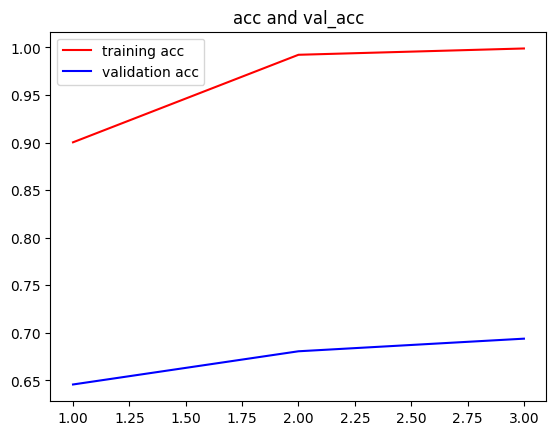

In [35]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

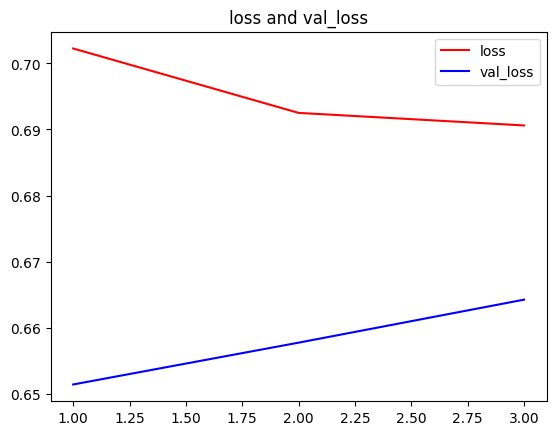

In [30]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [34]:
model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
           +'_'+str(test_result[1])[:4] + "_.h5")

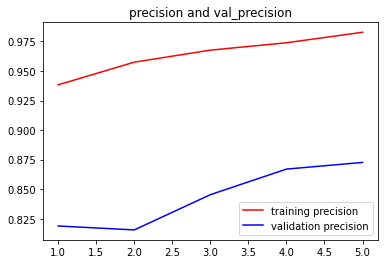

In [53]:
# plt.title('precision and val_precision')
# plt.plot(epochs, precision, 'red', label='training precision')
# plt.plot(epochs, val_precision, 'blue', label='validation precision')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Precision_ECT_16S.jpg")
# plt.show()

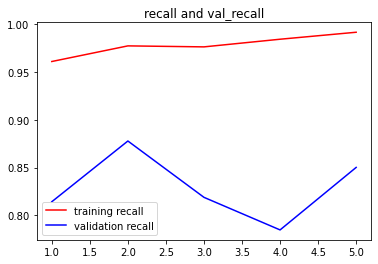

In [54]:
# plt.title('recall and val_recall')
# plt.plot(epochs, recall, 'red', label='training recall')
# plt.plot(epochs, val_recall, 'blue', label='validation recall')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Recall_ECT_16S.jpg")
# plt.show()

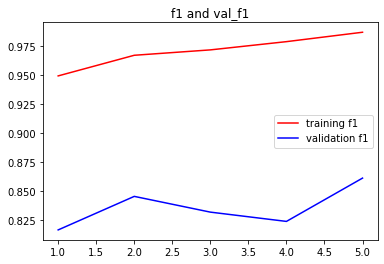

In [55]:
# plt.title('f1 and val_f1')
# plt.plot(epochs, f1, 'red', label='training f1')
# plt.plot(epochs, val_f1, 'blue', label='validation f1')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/F1_ECT_16S.jpg")
# plt.show()

# 测试模型

In [5]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd
import scipy.signal
import scipy.io as scio  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [6]:
loaded_model = tf.keras.models.load_model('../model_save/model_ECT+16s_64_3_0_0.89_.h5')

In [7]:
#读取测试数据
data_dir_file=r"../SE_testdata_processed/"
testmodel_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(testmodel_data_file_path))

94


In [8]:
path = "../SE_parameter/testmodel_matched_stimulate_parameter.xlsx"
df_testmodel = pd.read_excel(path,engine='openpyxl')
df_testmodel=df_testmodel.drop(['Unnamed: 0'],axis=1)
df_testmodel

,parameter,result
0,4,1
1,1,0
2,2,0
3,3,0
4,3,1
...,...,...
89,1,1
90,4,1
91,3,1
92,4,0


In [9]:
#发作为1；未发作为0
y_testmodel=[]
for i in range(df_testmodel.shape[0]):
    if df_testmodel.iloc[i,1]==1:
        y_testmodel.append(1)
    else:
        y_testmodel.append(0)
print(len(y_testmodel))
print(sum(y_testmodel))

94
75


In [10]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16
samps=2
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_testmodel:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_testmodel=y_long_data
print(len(y_testmodel))

752


In [11]:
x_testmodel=[]
for i in testmodel_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_testmodel.append(data_temp)   

Opening raw data file ../SE_testdata_processed\AV-何金蓓-20220511.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-何金蓓-20220516.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-何金蓓-20220518.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-何金蓓-20220520.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-余琛宇-20220411.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-余琛宇-20220413.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-余琛宇-20220415.fif...
Isotrak not found
    Range : 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6500\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-何金蓓-20220511.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6500\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-何金蓓-20220516.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6500\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-何金蓓-20220518.fif) does not conform to MNE naming con

Opening raw data file ../SE_testdata_processed\AV-王文珊-20200325.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-王文珊-20200328.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-王文珊-20200330.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-王胜银-20200513.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-王胜银-20200516.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-王胜银-20200520.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-王胜银-20200523.fif...
Isotrak not found
    Range : 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6500\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-王文珊-20200325.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6500\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-王文珊-20200328.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6500\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-王文珊-20200330.fif) does not conform to MNE naming con

In [12]:
# 引入刺激参数
ECT_code = []

for i in range(df_testmodel.shape[0]):
    if df_testmodel.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_testmodel.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_testmodel.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_testmodel.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code_testmodel = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code_testmodel = np.array(long_ECT_code_testmodel)
long_ECT_code_testmodel.shape

(752, 2)

In [13]:
x_testmodel=np.array(x_testmodel)
x_testmodel=x_testmodel.reshape(x_testmodel.shape[0],x_testmodel.shape[1],x_testmodel.shape[2],1)
y_testmodel=np.array(y_testmodel)
long_ECT_code_testmodel = np.array(long_ECT_code_testmodel)
loss_,acc_ = loaded_model.evaluate([x_testmodel,long_ECT_code_testmodel],y_testmodel)

24/24 [==============================] - 3s 100ms/step - loss: 1.1990 - accuracy: 0.7939
